# Intro

placeholder text

### Key Findings:

---

Challenges:

    - Large dataset (>200 cols)
    - Define KPI (churn)



In [1]:
# Import sys, os
import sys
import os

# Change the root folder path
project_root = os.path.abspath("..")
sys.path.append(project_root)

# Import analytical packages
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions.utils import identify_empty_cols

# Change pandas display options to visualize the entire dataframe info
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [2]:
# Import the raw data
df_raw = pd.read_csv('../data/telecom_churn_data.csv')

In [3]:
# Copy the dataframe and display shape
df = df_raw.copy()
df.shape

(99999, 226)

In [4]:
# Check the head
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
# Check the tail
df.tail()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,...,0,NaN,NaN,NaN,NaN,3199,0.00,0.00,0.00,0.0
99995,7000607688,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,112.201,...,0,NaN,NaN,NaN,NaN,2052,0.00,0.00,0.00,0.0
99996,7000087541,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,229.187,...,0,1.0,NaN,NaN,NaN,185,0.00,0.00,0.00,0.0
99997,7000498689,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,322.991,...,0,1.0,1.0,1.0,1.0,478,1445.74,1151.03,1173.18,0.0
99998,7001905007,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,687.065,...,0,1.0,NaN,NaN,NaN,751,0.00,0.00,0.00,0.0


In [6]:
# Check the data types
df.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

In [7]:
# Check for missing data
df.isna().mean()*100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

There is a lot of missing data. While some of it is within a somewhat acceptable range (up to 7%), some columns have over 70% of their data missing. Instead of just dropping these, we should investigate further, this could be a mislabeling issue, for example.

In [8]:
# Capture the columns with over 70% missing values in a list
na_pct = df.isna().mean()*100
missing_values_cols = na_pct[na_pct > 70].index

# Check the data
df[missing_values_cols].head(2).T

,0,1
date_of_last_rech_data_6,6/21/2014,NaN
date_of_last_rech_data_7,7/16/2014,7/25/2014
date_of_last_rech_data_8,8/8/2014,8/10/2014
date_of_last_rech_data_9,NaN,NaN
total_rech_data_6,1.0,NaN
total_rech_data_7,1.0,1.0
total_rech_data_8,1.0,2.0
total_rech_data_9,NaN,NaN
max_rech_data_6,252.0,NaN
max_rech_data_7,252.0,154.0


There is a an apparent pattern in the missing data. We can see that the missing values are actually meant to be 0.

If we take, for example, the `date_of_last_rech_data_9` for the data points above (which are NaN), we can see that all the other numerical values for the 9th month are also NaN. 

These have to do with how much data recharge each customer did for that particular month. Since the client did not recharge his data for that month, we can imput 0 for all the numeric values here represented as NaN.

For more details on what each acronym mean, check the [Data Dictionary]

It's also very important to understand the patterns in the missing data for the date columns. Take, for example, the second row for `date_of_last_rech_data_6`. The NaN value follows the same pattern as before. The value here is missing beacause the customer did not recharge their data on the 6th month. That is valuable information for our prediction model. Less active customers tend to churn more, so we want to capture that information in our dataset.

Some of the columns are meant to represent binary values: 1 for yes and 0 for no. We can also impute 0 for these columns (fb_users, night_pck_user)

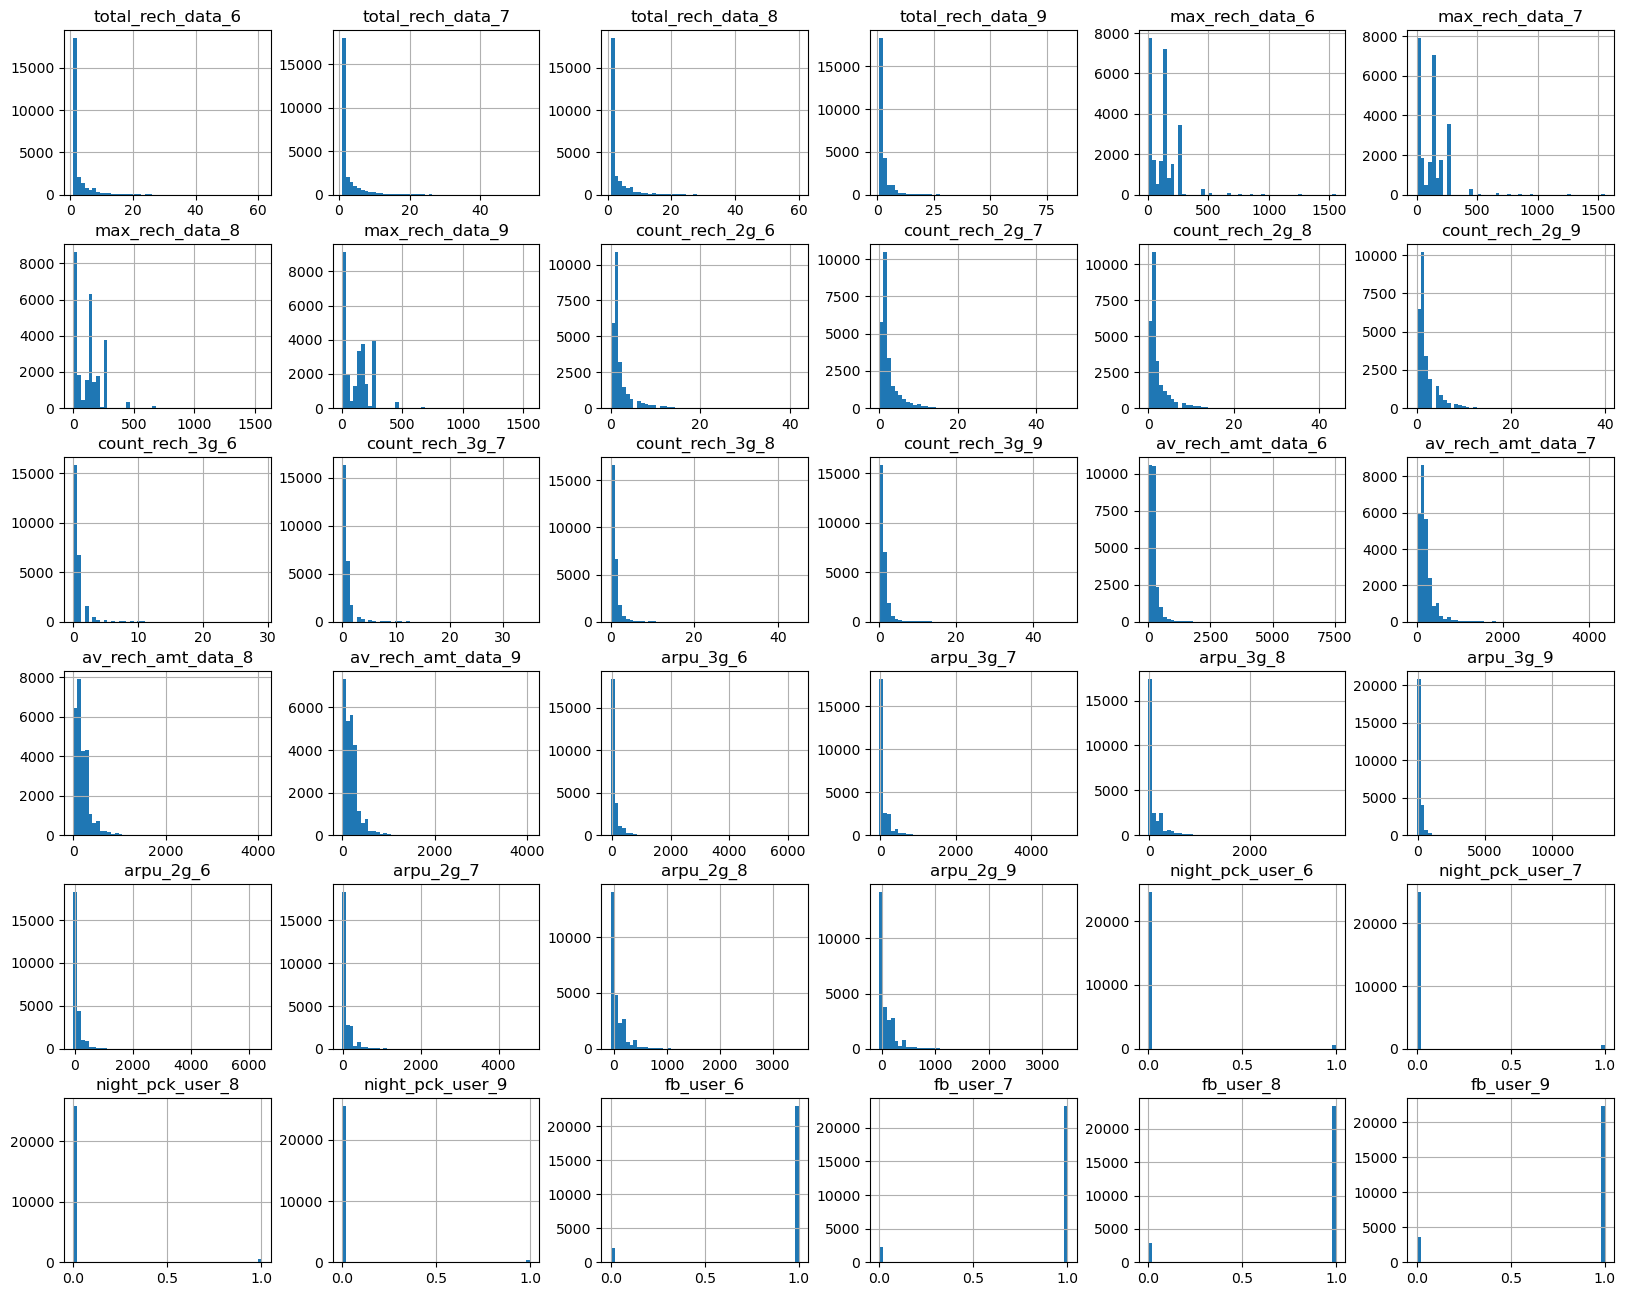

In [9]:
# Let's plot the distribution of the variables
df[missing_values_cols].hist(bins=50, figsize=(20, 16))
plt.show()

It's very important to highlight that we are only imputing data on **numeric columns**, we'll need a different approach to deal with our date columns, which we haven't converted to datetime yet, so they show up as object type.

In [10]:
df[missing_values_cols].dtypes

date_of_last_rech_data_6     object
date_of_last_rech_data_7     object
date_of_last_rech_data_8     object
date_of_last_rech_data_9     object
total_rech_data_6           float64
total_rech_data_7           float64
total_rech_data_8           float64
total_rech_data_9           float64
max_rech_data_6             float64
max_rech_data_7             float64
max_rech_data_8             float64
max_rech_data_9             float64
count_rech_2g_6             float64
count_rech_2g_7             float64
count_rech_2g_8             float64
count_rech_2g_9             float64
count_rech_3g_6             float64
count_rech_3g_7             float64
count_rech_3g_8             float64
count_rech_3g_9             float64
av_rech_amt_data_6          float64
av_rech_amt_data_7          float64
av_rech_amt_data_8          float64
av_rech_amt_data_9          float64
arpu_3g_6                   float64
arpu_3g_7                   float64
arpu_3g_8                   float64
arpu_3g_9                   

In [11]:
# Determine columns with over 70% missing values
na_pct = df.isna().mean() * 100
missing_values_cols = na_pct[na_pct > 70].index

# Select only numeric columns from missing columns
numeric_cols = missing_values_cols.intersection(df.select_dtypes(include=['int64', 'float64']).columns)

# Impute missing values with 0 in those columns
df.loc[:, numeric_cols] = df.loc[:, numeric_cols].fillna(0)

We can now see that all the columns with over 70% missing data have now been filled with the assigned value. In this case, it makes sense to arbitrarily imput 0 as a value, since it actually represents that the customer did not use a given service that month.

In [12]:
df.isna().mean() * 100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

Awesome! Except for the date columns, all of the other missing data has been succesfully imputed. There's still more data missing, so let's check that out:

In [13]:
# Check descriptive stats for outliers
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
arpu_9,99999.0,2.616451e+02,341.998630,-1.899505e+03,6.268500e+01,1.768490e+02,3.534665e+02,3.880562e+04
onnet_mou_6,96062.0,1.323959e+02,297.207406,0.000000e+00,7.380000e+00,3.431000e+01,1.187400e+02,7.376710e+03


We can see that some numerical columns have a **maximum value of 0**, this is a strong indicator that there is something wrong with the data there. Let's further inspect those


In [14]:
# Capture the descriptive stats in a temporary dataframe. Pivot so we can filter the 'max' value
described = df.describe().T

# Capture the indexes where the value for 'max' is 0 in a list
mask = described[described['max'] == 0].index.to_list()

# Inspect the values
df[mask].head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9
0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


It seems that some columns, while not empty, hold no information. It's all 0s or NaNs. Let's come up with a way to get rid of them.

In [15]:
# Id the columns with 0s and NaNs.
identify_empty_cols(df)

{'all_zero': [],
 'all_nan': [],
 'mixed': ['loc_og_t2o_mou',
  'std_og_t2o_mou',
  'loc_ic_t2o_mou',
  'std_og_t2c_mou_6',
  'std_og_t2c_mou_7',
  'std_og_t2c_mou_8',
  'std_og_t2c_mou_9',
  'std_ic_t2o_mou_6',
  'std_ic_t2o_mou_7',
  'std_ic_t2o_mou_8',
  'std_ic_t2o_mou_9']}

The columns above all contain a mix of 0s and NA values, lets get rid of them.

On a sidenote, to understand what they represent, we have to check the [Data Dictionary], but they are MOU (minutes of use) for incoming and outgoing standard calls to other operator's fixed lines

In [17]:
# Drop the empty columns
empty_columns = identify_empty_cols(df)['mixed']
df.drop(labels=empty_columns, axis=1, inplace=True)

Done! Now, let's move on to the date columns, or rather, the columns that represent date values.

In [45]:
# I'll capture the  columns that might be date columns in a list.
# I'll do that by matching the strings 'day' or 'date' in the column name.


date_columns = []

for col in df.columns:    
        if re.search(r'day|date', col, re.IGNORECASE):
            date_columns.append(col)

print(date_columns)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'last_day_rch_amt_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']
